In [ ]:
!pip install shap

In [4]:
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [2]:
import shap

In [3]:
model = pickle.load(open('pc_game_with_rating_model.pkl', 'rb'))

In [4]:
data = pd.read_pickle('proprocess_pc_game_data.pkl')

In [10]:
data.head()

,Achievements,Positive_ratings,Negative_ratings,Average_playtime,Median_playtime,Estimated_sales,Price,Year,Genres_Action,Genres_Adventure,...,Developer_upjers,Developer_vadimalexepta,Developer_zoocros,Developer_КиКо,Developer_一次元创作组,Developer_凝冰剑斩,Developer_哈视奇科技,Developer_橘喵喵,Developer_橘子班,Developer_橙光游戏
0,0,124534,3339,17612,317,9,7,2000,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3318,633,277,62,8,3,1999,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3416,398,187,34,8,3,2003,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1273,267,258,184,8,3,2001,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5250,288,624,415,8,3,1999,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
for i in data.columns:
    print(i)

Achievements
Positive_ratings
Negative_ratings
Average_playtime
Median_playtime
Estimated_sales
Price
Year
Genres_Action
Genres_Adventure
Genres_Animation & Modeling
Genres_Audio Production
Genres_Casual
Genres_Design & Illustration
Genres_Early Access
Genres_Education
Genres_Free to Play
Genres_Game Development
Genres_Gore
Genres_Indie
Genres_Massively Multiplayer
Genres_Nudity
Genres_Other
Genres_Photo Editing
Genres_RPG
Genres_Racing
Genres_Sexual Content
Genres_Simulation
Genres_Software Training
Genres_Sports
Genres_Strategy
Genres_Utilities
Genres_Video Production
Genres_Violent
Genres_Web Publishing
Categories_Captions available
Categories_Co-op
Categories_Commentary available
Categories_Cross-Platform Multiplayer
Categories_Full controller support
Categories_In-App Purchases
Categories_Includes Source SDK
Categories_Includes level editor
Categories_Local Co-op
Categories_Local Multi-Player
Categories_MMO
Categories_Multi-player
Categories_Online Co-op
Categories_Online Multi-Pl

In [15]:
import numpy as np
datainput = np.array([[33,67902,2419,691,402,7,2004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [16]:
model.predict(datainput, 
        prediction_type='Class', 
        ntree_start=0, 
        ntree_end=0, 
        thread_count=-1,
        verbose=None)

array([[9]], dtype=int64)

In [8]:
classification_drop_feature = data


X_drop_feature = classification_drop_feature.drop(['Owners'], axis = 1)
y_drop_feature = classification_drop_feature['Owners']

# แยก train_test_split ด้วยขนาด 80:20 และใช้ random_state ที่ 466 ซึ่งเป็น random_state ที่ดีที่สุดจากที่ทดลองมา
X_train , X_test , y_train , y_test = train_test_split(X_drop_feature , y_drop_feature , test_size = 0.2 , random_state = 466)

KeyError: "['Owners'] not found in axis"

In [19]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(datainput)

In [21]:
shap.force_plot(explainer, shap_values[datainput], features_display[datainput], matplotlib=True)

TypeError: only integer scalar arrays can be converted to a scalar index

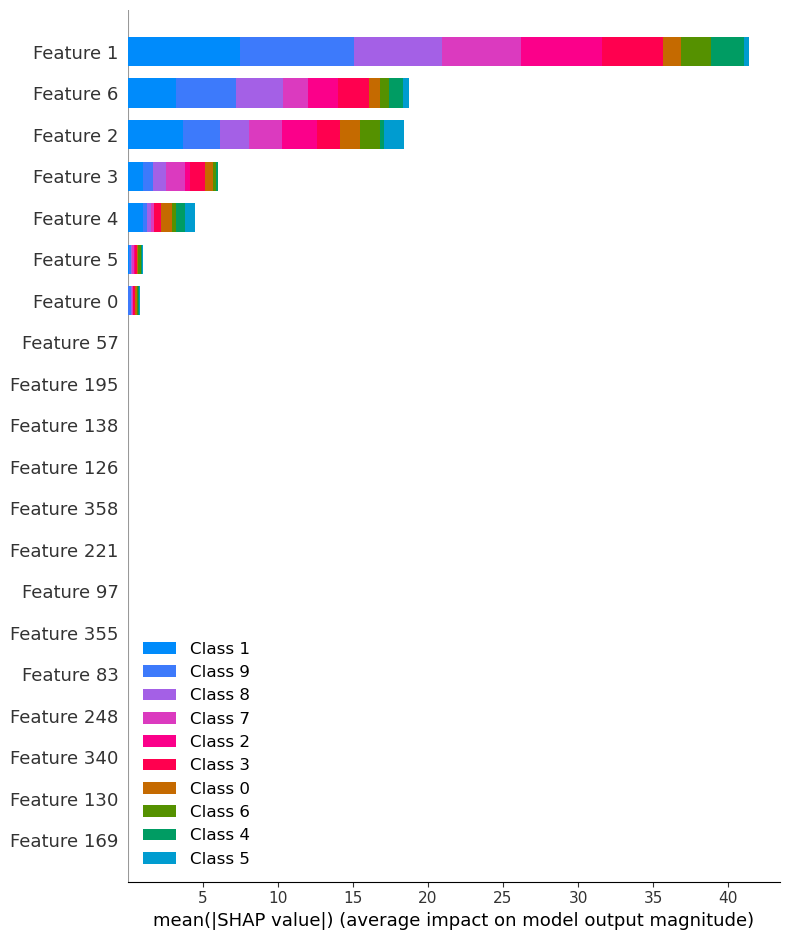

In [9]:
shap.summary_plot(shap_values, data, plot_type="bar")

In [21]:
sv = explainer(X_test)

In [22]:
sv.base_values[0]

array([ 7.8315743 ,  5.40554058,  3.76595445,  2.34039135,  0.2823393 ,
       -0.65255458, -4.28903002, -4.23986479, -5.04964874, -5.39470186])

In [23]:
sv.values[0]

array([[-1.71479407e-01, -1.29847028e-01, -9.80116265e-02, ...,
         6.20885570e-02, -5.32153250e-03,  8.27254851e-03],
       [ 1.63101359e+00,  3.41182807e-01, -1.73260528e-01, ...,
        -2.45754864e-01, -3.74750143e-02,  2.00934913e-02],
       [ 1.12113150e+00,  1.70398746e-01, -6.89637883e-02, ...,
         4.22386293e-02, -1.48713274e-02,  3.69888671e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.62111485e-06,  9.52020531e-06,  3.15492583e-06, ...,
        -7.45808983e-06, -4.29253864e-06, -3.62460349e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = X_test.iloc[select]
features_display = X_display.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer expected value: None


NameError: name 'X_display' is not defined

In [11]:
shap.decision_plot(expected_value, shap_values, features_display)

NameError: name 'expected_value' is not defined

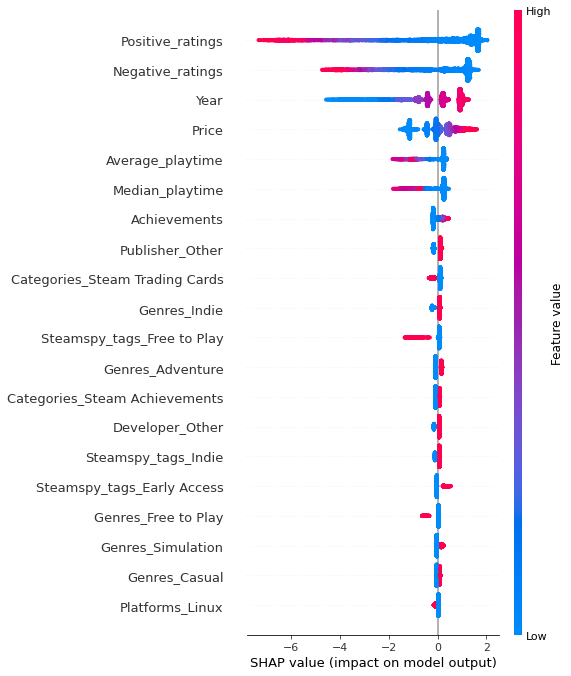

In [12]:
shap.summary_plot(shap_values[0], X_test)

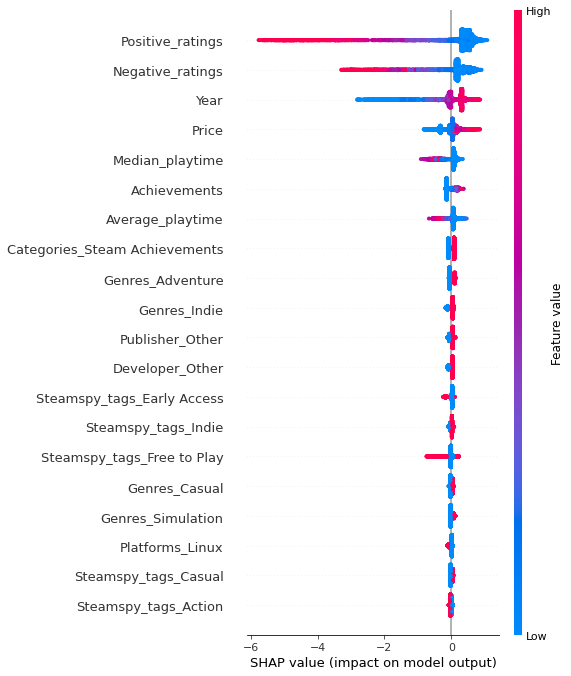

In [13]:
shap.summary_plot(shap_values[1], X_test)

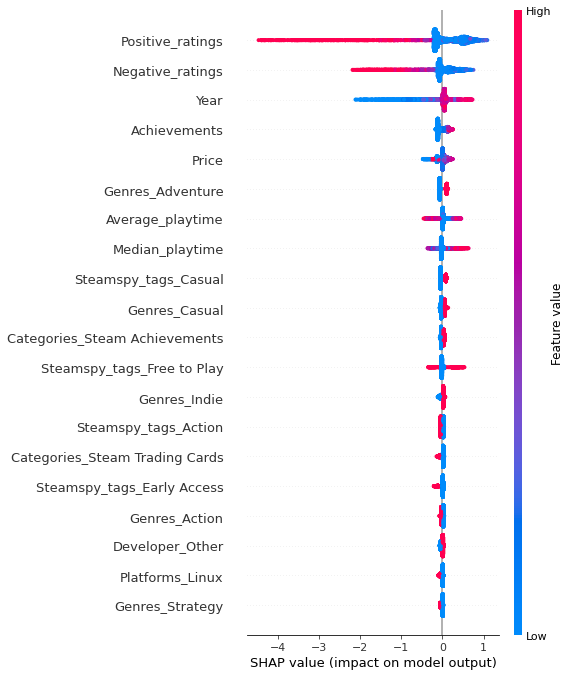

In [14]:
shap.summary_plot(shap_values[2], X_test)

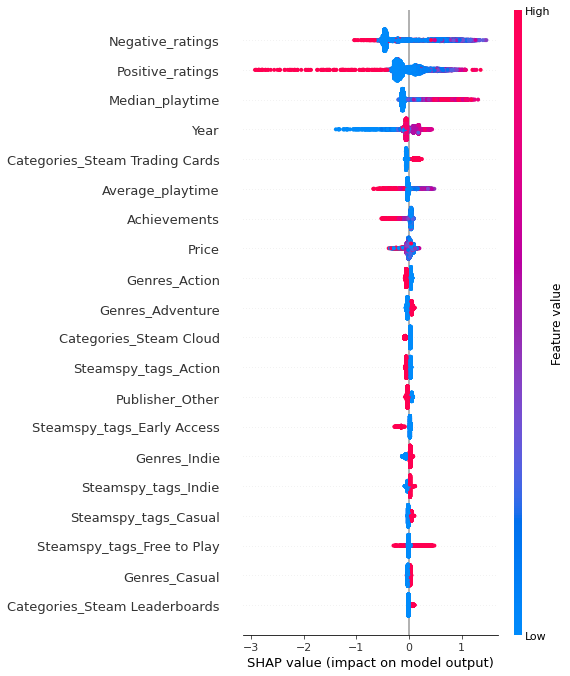

In [15]:
shap.summary_plot(shap_values[3], X_test)

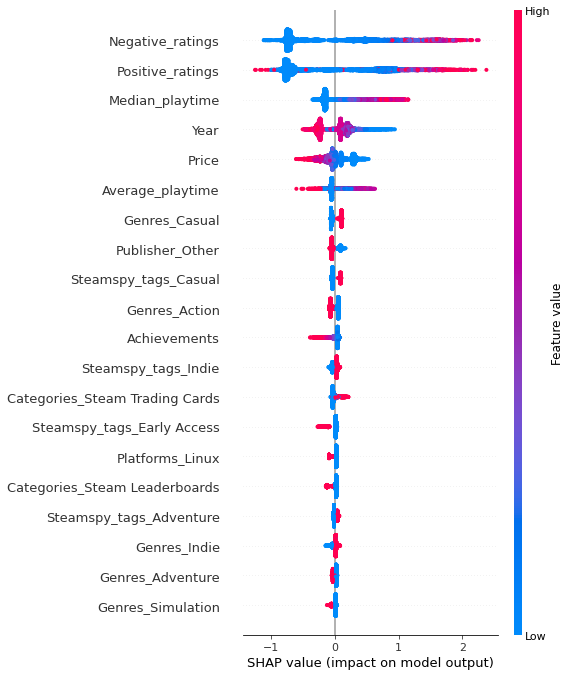

In [16]:
shap.summary_plot(shap_values[4], X_test)

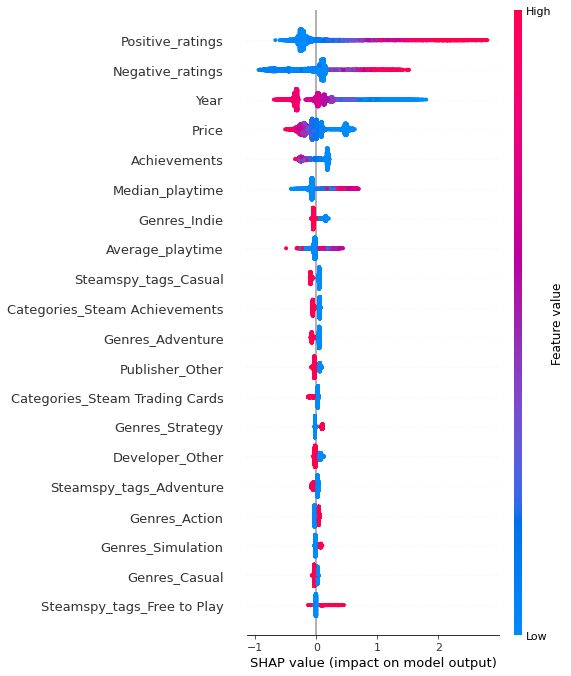

In [17]:
shap.summary_plot(shap_values[5], X_test)

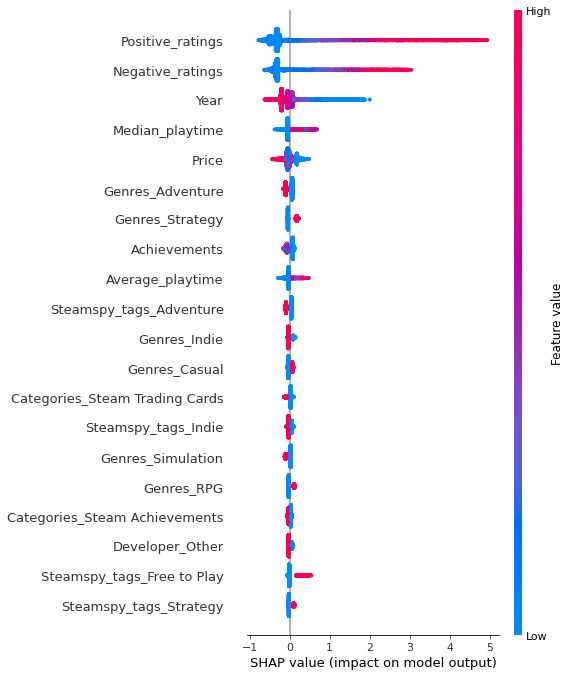

In [18]:
shap.summary_plot(shap_values[6], X_test)

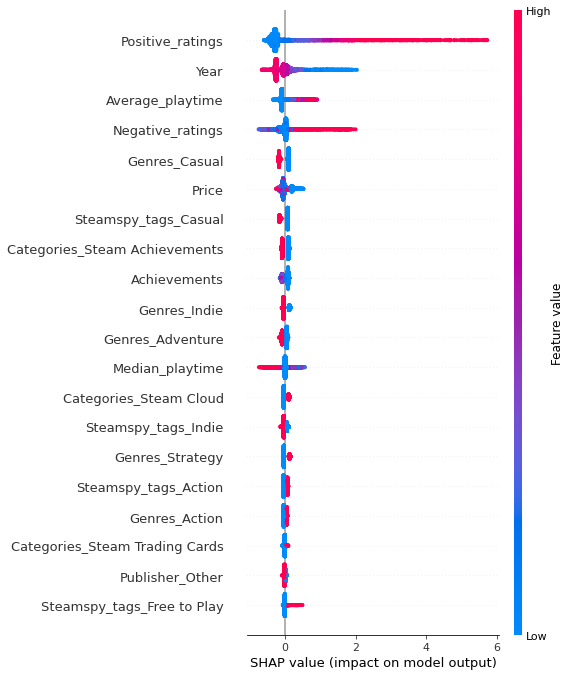

In [19]:
shap.summary_plot(shap_values[7], X_test)

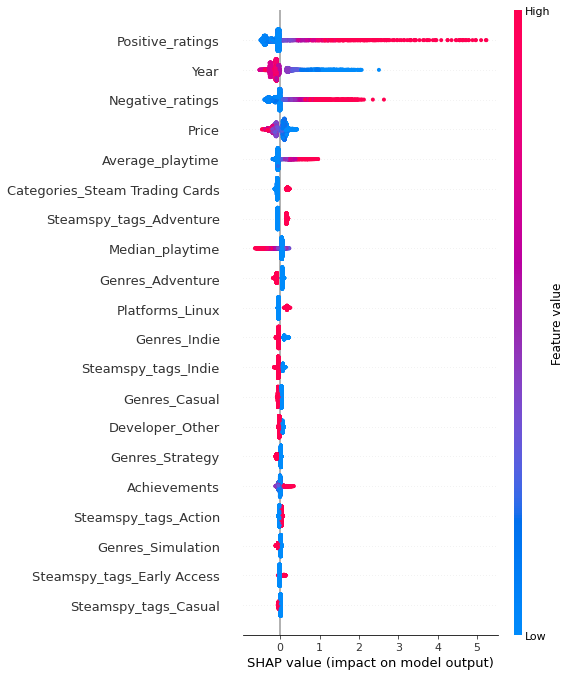

In [20]:
shap.summary_plot(shap_values[8], X_test)

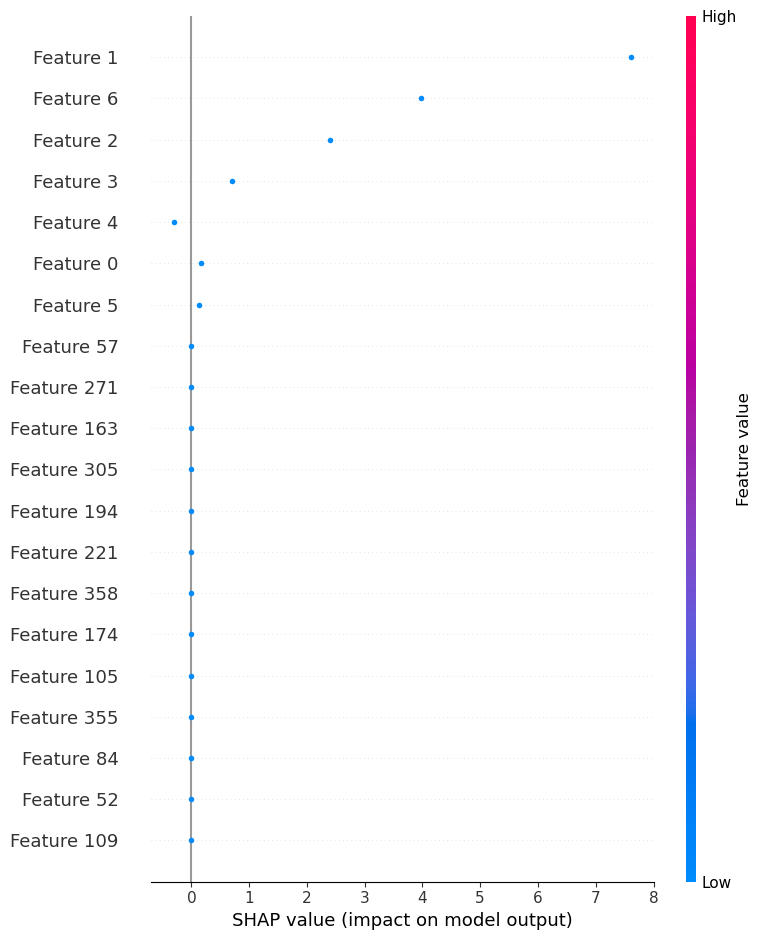

In [8]:
shap.summary_plot(shap_values[9], data)

In [6]:
shap.initjs()
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_drop_feature.values[i], feature_names = X_drop_feature.columns)

In [7]:
shap.initjs()
i=5
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_drop_feature.values[i], feature_names = X_drop_feature.columns)

In [8]:
shap.initjs()
i=16
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_drop_feature.values[i], feature_names = X_drop_feature.columns)

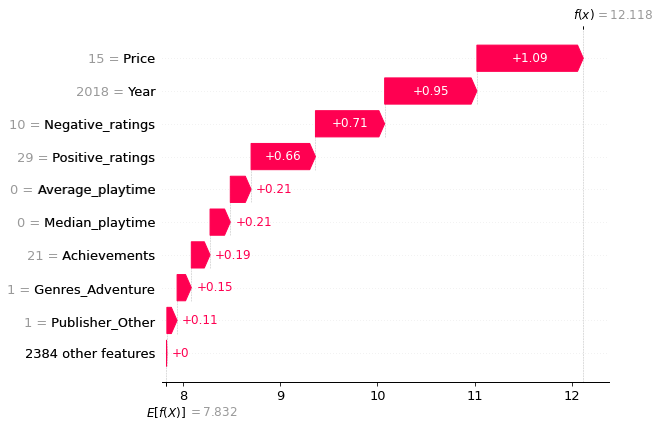

In [34]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

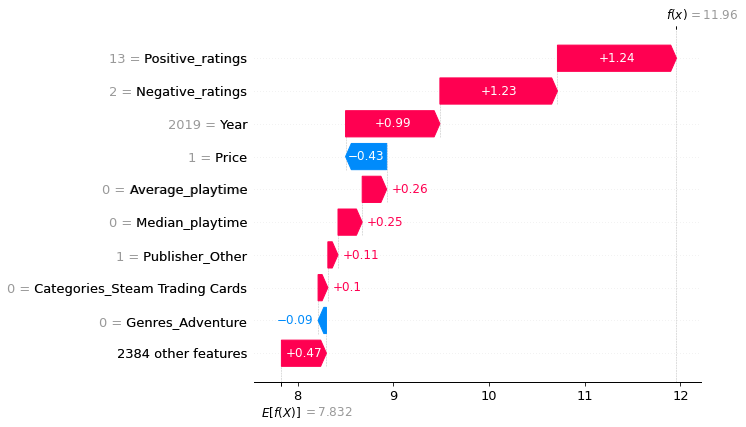

In [35]:
row = 5
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [29]:
# creating an explainer for our model
explainer = shap.TreeExplainer(model)

# finding out the shap values using the explainer
shap_values_test = explainer.shap_values(X_test)

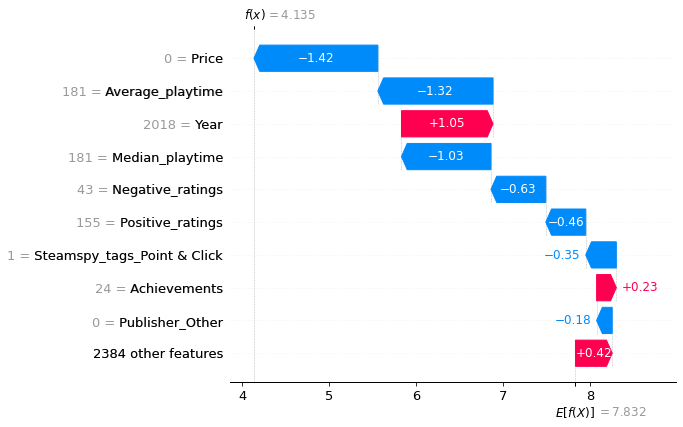

In [36]:
row = 16
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

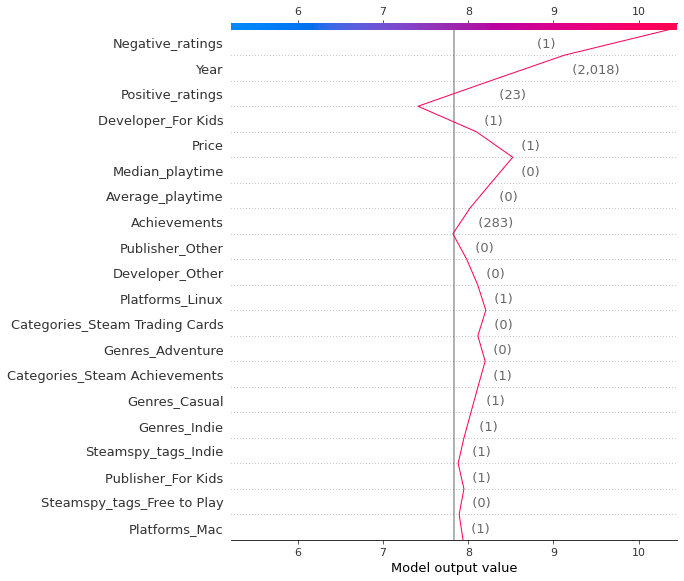

In [30]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values_test[0][3,:], X_test.iloc[3,:])

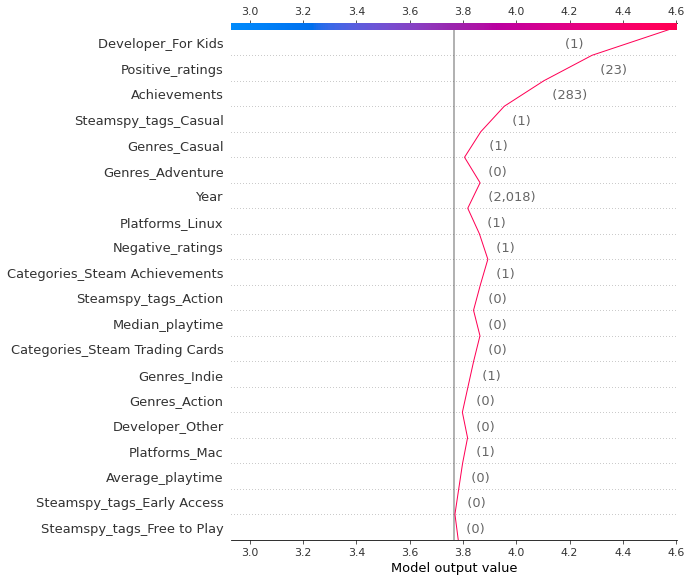

In [31]:
shap.initjs()
shap.decision_plot(explainer.expected_value[2], 
                shap_values_test[2][3,:], X_test.iloc[3,:])